In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import operator



In [2]:
# Data Preparation

data = json.loads(open('data.json').read())
fields = list(map(lambda x: x['label'], data['fields']))

df = pd.DataFrame(data['data'])
df = df.apply(pd.to_numeric)
df.columns = fields

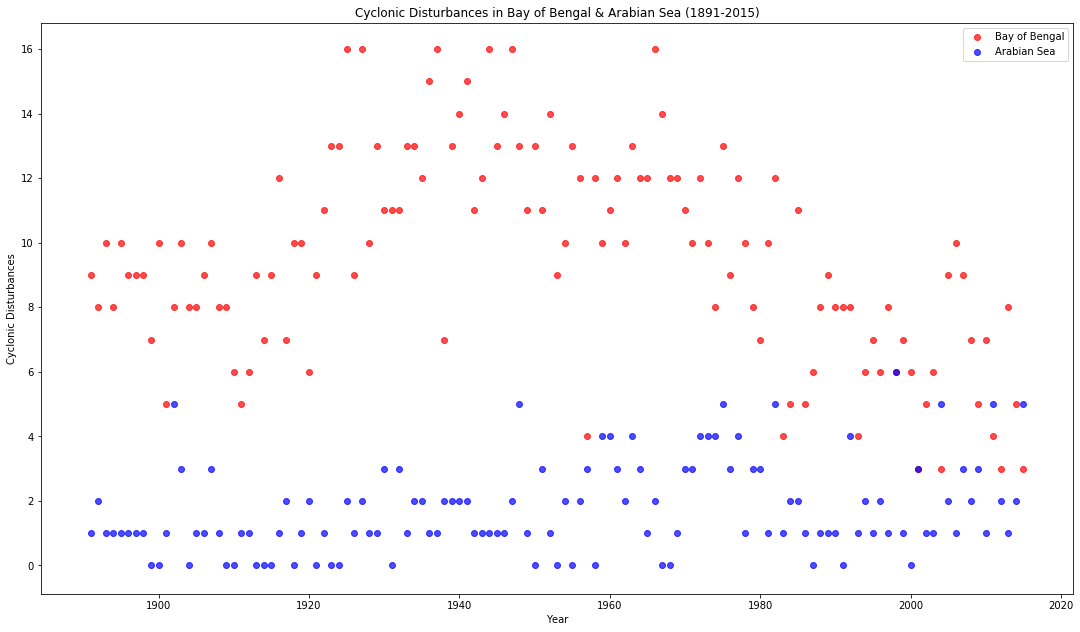

<Figure size 432x288 with 0 Axes>

In [3]:
# scatter plot
# plot each location of depressions vs year

# data prep
plot1_columns = ['Year', 'January - December (Whole Year): BOB',
       'January - December (Whole Year): AS',
       'January - December (Whole Year): Land']

plot1_data = df[plot1_columns]

#plot
x = plot1_data['Year']
y = (plot1_data['January - December (Whole Year): BOB'],
    plot1_data['January - December (Whole Year): AS'])

colors = ("red", "blue")
groups = ("Bay of Bengal", "Arabian Sea")


fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot()

ax.scatter(x, y[0], c=colors[0], alpha=0.7, label=groups[0])
ax.scatter(x, y[1], c=colors[1], alpha=0.7, label=groups[1])
plt.title('Cyclonic Disturbances in Bay of Bengal & Arabian Sea (1891-2015)')
plt.xlabel('Year')
plt.ylabel('Cyclonic Disturbances')
plt.legend(loc=0)
plt.show()
plt.savefig('images/scatter.png')

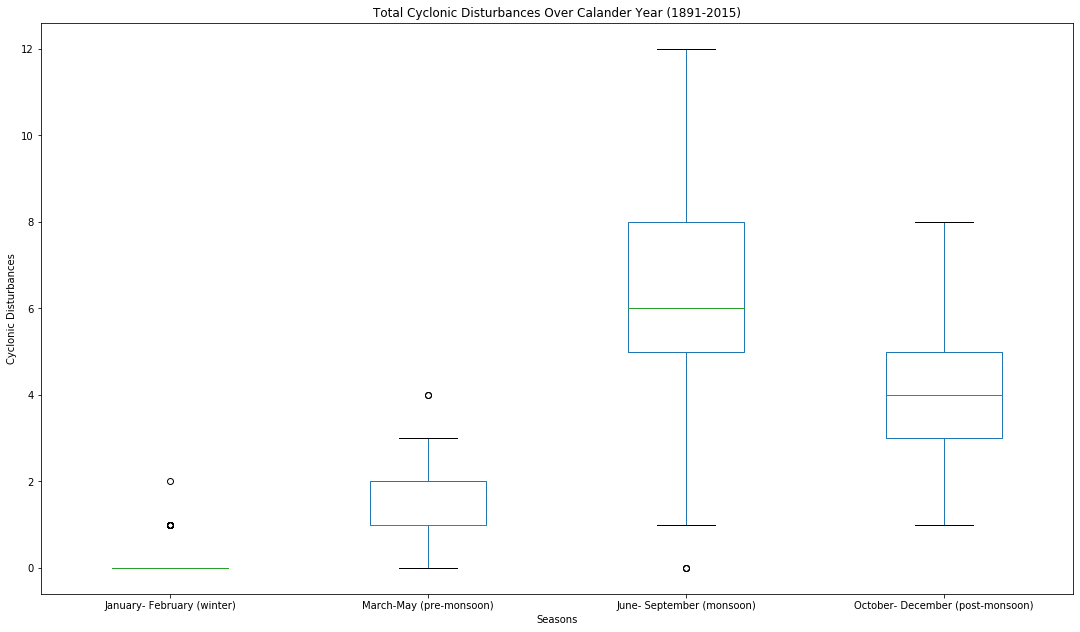

<Figure size 432x288 with 0 Axes>

In [4]:
# box plot
# distribution of dipression over seasons


plot2_data = df[['January- February (winter): Total',
                'March-may (pre-monsoon): Total',
                'June- September (monsoon): Total',
                'October- December (post-monsoon): Total']]
plot2_columns = [
    'January- February (winter)',
    'March-May (pre-monsoon)',
    'June- September (monsoon)',
    'October- December (post-monsoon)'
]
plot2_data.columns = plot2_columns

boxplot = plot2_data.boxplot(column=plot2_columns, figsize=(18.5, 10.5), grid=False,  return_type='axes')
plt.axes(boxplot)
plt.title('Total Cyclonic Disturbances Over Calander Year (1891-2015)')
plt.xlabel('Seasons')
plt.ylabel('Cyclonic Disturbances')
plt.show()
plt.savefig('images/box.png')

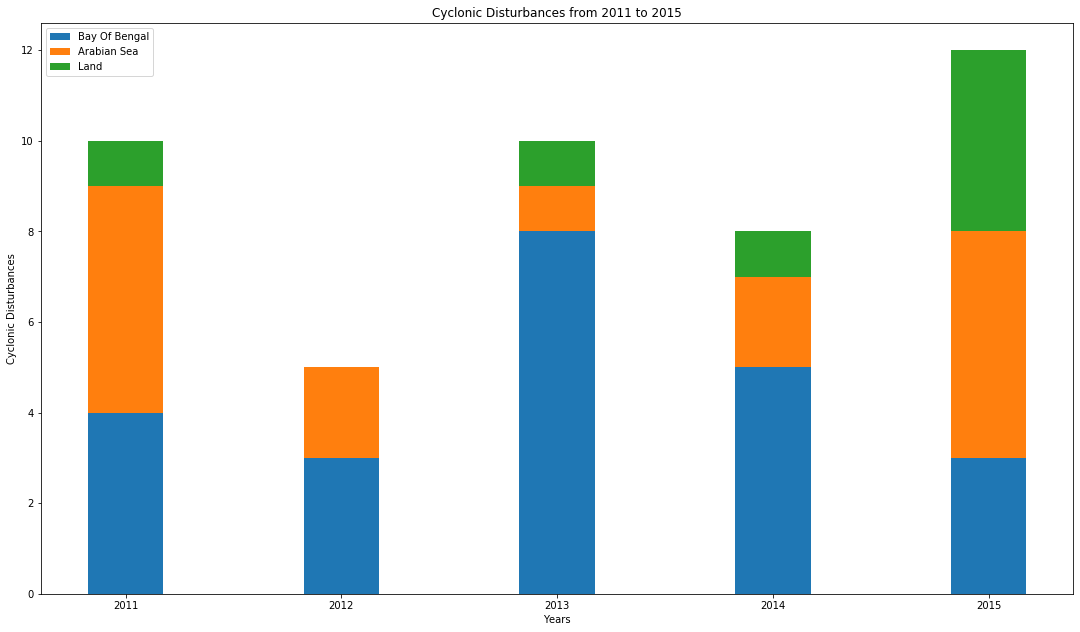

<Figure size 432x288 with 0 Axes>

In [5]:
# bar plot
# stacked depression vs year
plot3_columns = ['Year','January - December (Whole Year): BOB',
       'January - December (Whole Year): AS',
       'January - December (Whole Year): Land',
       'January - December (Whole Year): Total']

plot3_data = df[plot3_columns][-5:]
plot3_columns = ['Year', 'Bay Of Bengal', 'Arabian Sea', 'Land', 'Total']
plot3_data.columns = plot3_columns
x = tuple(plot3_data['Year'])
y1 = tuple(plot3_data['Bay Of Bengal'])
y2 = tuple(plot3_data['Arabian Sea'])
y3 = tuple(plot3_data['Land'])

width = 0.35

fig = plt.figure()
fig.set_size_inches(18.5, 10.5)
ax = fig.add_subplot()

p1 = ax.bar(x, y1, width=0.35)
p2 = ax.bar(x, y2, bottom=y1, width=0.35)
p3 = ax.bar(x, y3, bottom=tuple(map(operator.add, y1, y2)), width=0.35)

plt.ylabel('Cyclonic Disturbances')
plt.xlabel('Years')
plt.title('Cyclonic Disturbances from 2011 to 2015')
plt.legend((p1[0], p2[0], p3[0]), ('Bay Of Bengal', 'Arabian Sea', 'Land'), loc=0)
plt.show()
plt.savefig('images/bar.png')